In [7]:
import sys
!{sys.executable} -m pip install --user pandas mongoengine matplotlib pycoshark

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mongoengine import connect

from pycoshark.mongomodels import Project, VCSSystem, Commit, Tag, File, CodeEntityState, FileAction, People, IssueSystem, Issue, Message, MailingList, Event, MynbouData, Identity, Hunk, Branch, Refactoring


In [9]:
#%matplotlib inline


db = {'host': '10.0.0.15',
       'port': 27017,
       'db': 'vcsshark',
       'authentication_source': 'admin',
       'connect': False}
connect(**db)

MongoClient(host=['10.0.0.15:27017'], document_class=dict, tz_aware=False, connect=False, read_preference=Primary())

In [10]:
project_name = 'de.ugoe.cs.rwm.cocci'
p = Project.objects.get(name=project_name)
vcs = VCSSystem.objects.get(project_id=p.id)

data = []
for c in Commit.objects.filter(parents__1__exists=False).order_by('committer_date'):    
    tmp = {'date': c.committer_date, 'lloc': 0, 'mccc': 0, 'message': c.message, 'revision_hash': c.revision_hash}
    
    for ces in CodeEntityState.objects.filter(id__in=c.code_entity_states, ce_type='file', long_name__endswith='.java'):
        tmp['lloc'] += ces.metrics['LLOC']
        tmp['mccc'] += ces.metrics['McCC']
    
    data.append(tmp)

In [11]:
df = pd.DataFrame(data)

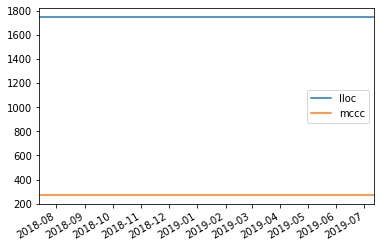

In [12]:
df.index = df['date'].values
df[['lloc', 'mccc']].plot()